In [36]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



In [37]:
# Menentukan variabel x dan y
df = pd.read_excel('Listrik.xlsx')
penduduk=df['x']
tahun = df['tahun']

X = df[['x']]
y = round(df['y'],2)

In [38]:
# Menampilkan 5 data di awal baris
df.head(11)


,tahun,x,y
0,2011,242.0,72512.649
1,2012,245.4,72133.000
2,2013,248.8,77211.000
3,2014,252.2,84086.000
4,2015,255.5,88682.000
5,2016,258.7,93635.000
6,2017,264.5,94457.000
7,2018,267.1,97927.000
8,2019,269.6,103833.000
9,2020,270.2,112754.000


In [39]:
# Proses linear regression dalam menentukan persamaan model
regression = linear_model.LinearRegression()
model = regression.fit(X.values,y)
a = regression.intercept_
b = regression.coef_[0]


print('Persamaan Linear dari Ketersediaan LPG adalah y = ',round(a,3),' + ',
      round(b,3),'.X1 ')


Persamaan Linear dari Ketersediaan LPG adalah y =  -254239.231  +  1337.921 .X1 


### Menentukan Standar Error

In [40]:
y_pred = regression.predict(X.values)

r2 = r2_score(y, y_pred)
print('Nilai R2 Model Persamaan Konsumsi  : ' ,r2)

Nilai R2 Model Persamaan Konsumsi  :  0.9416211851998079


In [41]:
# Melakukan prediksi terhadap data aktual 
df['y_aks'] = round(a + (b * X['x']),2)

In [42]:
# Menampilkan hasil prediksi data aktual dalam sebuah tabel
nilai_x = X['x']
result = pd.DataFrame({'x ': nilai_x, 'y ':y, 'Prediksi ': round(df['y_aks'],2)})

print(result)

       x          y   Prediksi 
0   242.0   72512.65   69537.67
1   245.4   72133.00   74086.61
2   248.8   77211.00   78635.54
3   252.2   84086.00   83184.47
4   255.5   88682.00   87599.61
5   258.7   93635.00   91880.96
6   264.5   94457.00   99640.90
7   267.1   97927.00  103119.49
8   269.6  103833.00  106464.30
9   270.2  112754.00  107267.05
10  272.6  114664.00  110478.06


In [43]:
# Prose menghitung nilai absolut dan standar error
# df['Nilai_abs'] = round(np.abs(y - df['y_aks']),2)
# df['Standar Error(%)'] = round((df['Nilai_abs']/y)*100,2)
# print(df)

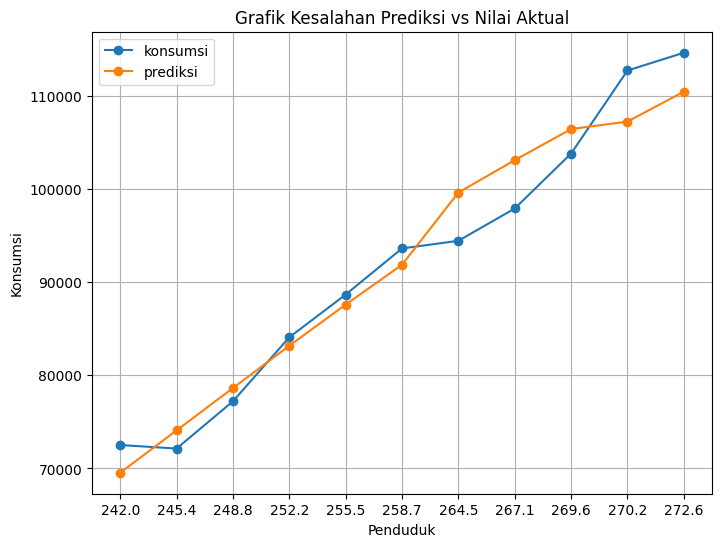

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(y, marker='o', linestyle='-', label='konsumsi')
plt.plot(df['y_aks'], marker='o', linestyle='-', label='prediksi')
plt.title('Grafik Kesalahan Prediksi vs Nilai Aktual')
plt.xlabel('Penduduk')
plt.ylabel('Konsumsi')
plt.grid(True)
plt.xticks(range(len(penduduk)), penduduk)
plt.legend()
plt.show()

Pertumbuhan Eksponensial

In [45]:
def eksponensial(t, A, r):
    return A * np.exp(r * (t - tahun[0]))

In [46]:
params, covariance = curve_fit(eksponensial, tahun, penduduk, p0=[penduduk[0], 0.01])

A, r = params

In [47]:
print(A,r)

243.0730046296203 0.012372223398692777


In [48]:
tahun_prediksi = np.arange(2022, 2031)
penduduk_prediksi = eksponensial(tahun_prediksi, A, r)

Prediksi Konsumsi Berdasarkan Jumlah Penduduk Tahun 2022 - 2030

In [49]:
hasil_prediksi_konsumsi = []
for i in penduduk_prediksi: 
    konsumsi = a + (b*i)
    hasil_prediksi_konsumsi.append([i, round(konsumsi, 2)])


In [50]:
print(hasil_prediksi_konsumsi)

[[278.51064637095527, 118386.04], [281.9778465670004, 123024.88], [285.4882102017007, 127721.47], [289.04227461998335, 132476.53], [292.6405838562232, 137290.78], [296.2836887175204, 142164.97], [299.9721468680146, 147099.83], [303.70652291424864, 152096.13], [307.48738849159514, 157154.63]]


In [51]:
tahun_prediksi = np.arange(2022, 2031)

print("Tahun | Penduduk | Konsumsi Prediksi")
print("----------------------------")
for i in range(len(hasil_prediksi_konsumsi)):
    tahun = tahun_prediksi[i]
    penduduk = hasil_prediksi_konsumsi[i][0] 
    konsumsi = hasil_prediksi_konsumsi[i][1] 
    print(f"{tahun}  |  {round(penduduk, 2)}  |  {round(konsumsi, 2)}")

Tahun | Penduduk | Konsumsi Prediksi
----------------------------
2022  |  278.51  |  118386.04
2023  |  281.98  |  123024.88
2024  |  285.49  |  127721.47
2025  |  289.04  |  132476.53
2026  |  292.64  |  137290.78
2027  |  296.28  |  142164.97
2028  |  299.97  |  147099.83
2029  |  303.71  |  152096.13
2030  |  307.49  |  157154.63


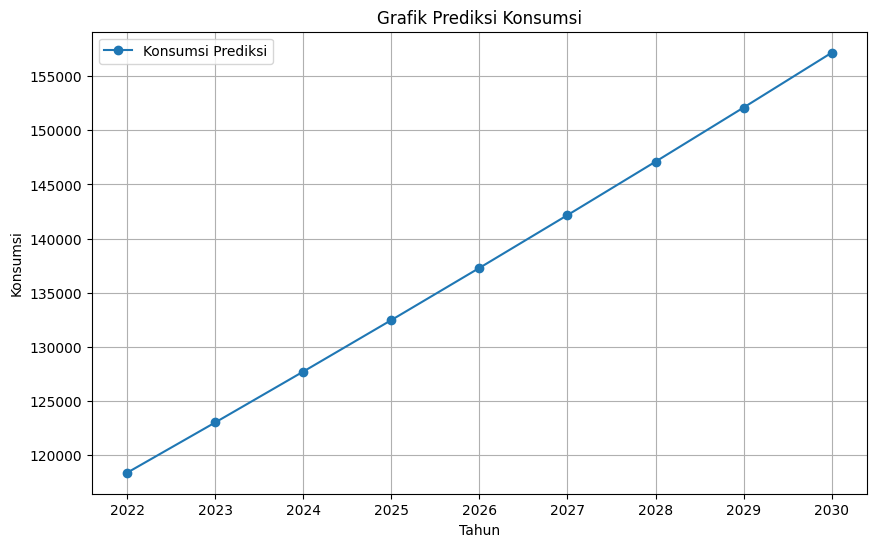

In [52]:
konsumsi = [data[1] for data in hasil_prediksi_konsumsi]

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(tahun_prediksi, konsumsi, marker='o', label='Konsumsi Prediksi')
plt.title('Grafik Prediksi Konsumsi')
plt.xlabel('Tahun')
plt.ylabel('Konsumsi')
plt.grid(True)
plt.legend()
plt.show()